## 240326 Python Module(1)

### Pandas 기초

In [1]:
# pandas의 기본은 한 줄로 이루어진 Series (열 1개, 같은 자료형)
# NaN: Not a Number (비어있음, 실수로 취급됨)
import pandas as pd
import numpy as np
s = pd.Series([1, 2, 3, 4, 5, 6, np.NaN])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    NaN
dtype: float64

In [2]:
# data_range를 통해 편하게 시간에 접근 가능
# 만년 달력 프로그램: 윤년, 윤달 고려하여 알아서 날짜 만들어줌
dates = pd.date_range('20240326', periods=6)
dates

DatetimeIndex(['2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
               '2024-03-30', '2024-03-31'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# pandas에서 가장 많이 사용하는 형태는 엑셀과 유사한 DataFrame (행, 열, index, col name, value)
df = pd.DataFrame(np.random.randn(6, 4),
                  index=dates,
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765
2024-03-30,-0.921025,1.981116,2.069549,0.388263
2024-03-31,0.787716,1.053909,1.074346,-0.575060


In [4]:
# 다양한 자료형의 dictionary형 데이터 생성
# (상수, timestamp, Series, numpy array, 범주형, 문자열)
data = {'A': 1,
        'B': pd.Timestamp('20240326'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3] * 4, dtype='int32'),
        'E': pd.Categorical(["test", "train", "test", "train"]),
        'F': 'foo'}
data

{'A': 1,
 'B': Timestamp('2024-03-26 00:00:00'),
 'C': 0    1.0
 1    1.0
 2    1.0
 3    1.0
 dtype: float32,
 'D': array([3, 3, 3, 3], dtype=int32),
 'E': ['test', 'train', 'test', 'train']
 Categories (2, object): ['test', 'train'],
 'F': 'foo'}

In [5]:
# dictionary형을 이용해서 DataFrame을 만들 수 있으며
# dictionary의 각 key가 column name이 됨
df2 = pd.DataFrame(data)
df2

,A,B,C,D,E,F
0,1,2024-03-26,1.0,3,test,foo
1,1,2024-03-26,1.0,3,train,foo
2,1,2024-03-26,1.0,3,test,foo
3,1,2024-03-26,1.0,3,train,foo


In [9]:
# head(): 처음 몇 열을 보여줌 (default=5)
df.head()

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765
2024-03-30,-0.921025,1.981116,2.069549,0.388263


In [10]:
df.head(3)

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636


In [11]:
# tail(): 마지막 몇 열을 보여줌 (default=5)
df.tail()

,A,B,C,D
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765
2024-03-30,-0.921025,1.981116,2.069549,0.388263
2024-03-31,0.787716,1.053909,1.074346,-0.575060


In [12]:
df.tail(3)

,A,B,C,D
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765
2024-03-30,-0.921025,1.981116,2.069549,0.388263
2024-03-31,0.787716,1.053909,1.074346,-0.575060


In [13]:
# index, column, value 값들만 따로 출력 가능
df.index

DatetimeIndex(['2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
               '2024-03-30', '2024-03-31'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[ 0.34381342,  1.12539135,  0.63769065, -0.29719003],
       [ 1.12549367,  0.93917855,  0.42024187,  1.11411804],
       [ 1.16893391,  0.58502329, -0.32558676, -1.29163638],
       [-0.83975257, -0.74919685, -0.29253845, -0.17976494],
       [-0.92102533,  1.98111606,  2.06954852,  0.38826265],
       [ 0.78771634,  1.05390856,  1.07434565, -0.57505987]])

In [16]:
# describe(): 통계적 개요를 볼 수도 있음
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.277530,0.822570,0.597284,-0.140212
std,0.944794,0.897544,0.902397,0.823858
min,-0.921025,-0.749197,-0.325587,-1.291636
25%,-0.543861,0.673562,-0.114343,-0.505592
50%,0.565765,0.996544,0.528966,-0.238477
75%,1.041049,1.107521,0.965182,0.246256
max,1.168934,1.981116,2.069549,1.114118


In [18]:
# 특정 column 기준으로 정렬 (dafault: ascending=True)
df.sort_values(by='B')

,A,B,C,D
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-31,0.787716,1.053909,1.074346,-0.575060
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-30,-0.921025,1.981116,2.069549,0.388263


In [19]:
# descending
df.sort_values(by='B', ascending=False)

,A,B,C,D
2024-03-30,-0.921025,1.981116,2.069549,0.388263
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-31,0.787716,1.053909,1.074346,-0.575060
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765


### Pandas 응용: 변경하기

In [20]:
# 예제로 사용할 DataFrame을 Dictionary형에서 생성
data = {'a': [1, 2, 3, 4],
        'b': [0, 1, 0.1, 0.2],
        'sub': ['1st', '2nd', '3rd', '4th']}
data

{'a': [1, 2, 3, 4], 'b': [0, 1, 0.1, 0.2], 'sub': ['1st', '2nd', '3rd', '4th']}

In [21]:
df3 = pd.DataFrame(data)
df3

,a,b,sub
0,1,0.0,1st
1,2,1.0,2nd
2,3,0.1,3rd
3,4,0.2,4th


In [23]:
# dtypes 옵션: DataFrame column의 자료형 확인
df3.dtypes

a        int64
b      float64
sub     object
dtype: object

In [25]:
# column 순서 변경
df3 = pd.DataFrame(data, columns=['sub', 'a', 'b'])
df3

,sub,a,b
0,1st,1,0.0
1,2nd,2,1.0
2,3rd,3,0.1
3,4th,4,0.2


In [26]:
# 특정 위치의 데이터 변경
df3['c'] = np.nan
df3

,sub,a,b,c
0,1st,1,0.0,NaN
1,2nd,2,1.0,NaN
2,3rd,3,0.1,NaN
3,4th,4,0.2,NaN


In [27]:
# loc[]: 행과 열의 이름(변수명)으로 특정 위치 접근 가능
df3.loc[1, ['c']] = 2
df3

,sub,a,b,c
0,1st,1,0.0,NaN
1,2nd,2,1.0,2.0
2,3rd,3,0.1,NaN
3,4th,4,0.2,NaN


In [28]:
# + 연산자: 간단히 열 추가 가능
df3['d'] = df3['a'] + df3['b']
df3

,sub,a,b,c,d
0,1st,1,0.0,NaN,1.0
1,2nd,2,1.0,2.0,3.0
2,3rd,3,0.1,NaN,3.1
3,4th,4,0.2,NaN,4.2


In [29]:
# 행 추가: 새로운 index 선언 후 값 대입
df3.loc[4] = np.nan
df3

,sub,a,b,c,d
0,1st,1.0,0.0,NaN,1.0
1,2nd,2.0,1.0,2.0,3.0
2,3rd,3.0,0.1,NaN,3.1
3,4th,4.0,0.2,NaN,4.2
4,NaN,NaN,NaN,NaN,NaN


In [30]:
df3.loc[4] = ['5th', 'a', 'b', 'c', 'd']
df3

,sub,a,b,c,d
0,1st,1.0,0.0,NaN,1.0
1,2nd,2.0,1.0,2.0,3.0
2,3rd,3.0,0.1,NaN,3.1
3,4th,4.0,0.2,NaN,4.2
4,5th,a,b,c,d


### Pandas 추가 설명 - slice

In [31]:
# 특정 열(column) 선택
df

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-29,-0.839753,-0.749197,-0.292538,-0.179765
2024-03-30,-0.921025,1.981116,2.069549,0.388263
2024-03-31,0.787716,1.053909,1.074346,-0.575060


In [33]:
df['A']

2024-03-26    0.343813
2024-03-27    1.125494
2024-03-28    1.168934
2024-03-29   -0.839753
2024-03-30   -0.921025
2024-03-31    0.787716
Freq: D, Name: A, dtype: float64

In [34]:
# 특정 행(index) 선택: slice로 범위 지정
df[0:3]

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636


In [35]:
# 특정 행(index) 선택: index 이름으로 찾기
df.loc[dates[0]]

A    0.343813
B    1.125391
C    0.637691
D   -0.297190
Name: 2024-03-26 00:00:00, dtype: float64

In [36]:
# :만 사용하면 DataFrame 전체를 의미함
df.loc[:, ['A', 'B']]

,A,B
2024-03-26,0.343813,1.125391
2024-03-27,1.125494,0.939179
2024-03-28,1.168934,0.585023
2024-03-29,-0.839753,-0.749197
2024-03-30,-0.921025,1.981116
2024-03-31,0.787716,1.053909


In [37]:
df.loc['20240326':'20240328', ['A', 'B']]

,A,B
2024-03-26,0.343813,1.125391
2024-03-27,1.125494,0.939179
2024-03-28,1.168934,0.585023


In [38]:
df.loc['20240326', ['A', 'B']]

A    0.343813
B    1.125391
Name: 2024-03-26 00:00:00, dtype: float64

In [39]:
df.loc[dates[0], 'A']

0.3438134241213797

In [40]:
# iloc: 행/열 순서로 범위 지정
# n:m일 때, n부터 m-1까지를 의미함
df.iloc[3]

A   -0.839753
B   -0.749197
C   -0.292538
D   -0.179765
Name: 2024-03-29 00:00:00, dtype: float64

In [42]:
df.iloc[3:5, 0:2]

,A,B
2024-03-29,-0.839753,-0.749197
2024-03-30,-0.921025,1.981116


In [43]:
# iloc: 비연속적인 행/열 지정 가능
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2024-03-27,1.125494,0.420242
2024-03-28,1.168934,-0.325587
2024-03-30,-0.921025,2.069549


In [44]:
df.iloc[1:3, :]

,A,B,C,D
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636


In [45]:
df.iloc[:, 1:3]

,B,C
2024-03-26,1.125391,0.637691
2024-03-27,0.939179,0.420242
2024-03-28,0.585023,-0.325587
2024-03-29,-0.749197,-0.292538
2024-03-30,1.981116,2.069549
2024-03-31,1.053909,1.074346


In [46]:
df.iloc[1, 1]

0.9391785523890032

In [47]:
# 조건문 적용도 가능 (논리적 인덱싱)
df[df['A'] > 0]

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,-0.297190
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,-0.325587,-1.291636
2024-03-31,0.787716,1.053909,1.074346,-0.575060


In [48]:
df[df > 0]

,A,B,C,D
2024-03-26,0.343813,1.125391,0.637691,NaN
2024-03-27,1.125494,0.939179,0.420242,1.114118
2024-03-28,1.168934,0.585023,NaN,NaN
2024-03-29,NaN,NaN,NaN,NaN
2024-03-30,NaN,1.981116,2.069549,0.388263
2024-03-31,0.787716,1.053909,1.074346,NaN


### Matplotlib 기초

In [49]:
# Python에서 다양한 데이터의 시각화를 지원하는 모듈
# matplot에서 2D 그래프를 그리는 일반적 명령들은 pyplot에 있음
import matplotlib.pyplot as plt
%matplotlib inline

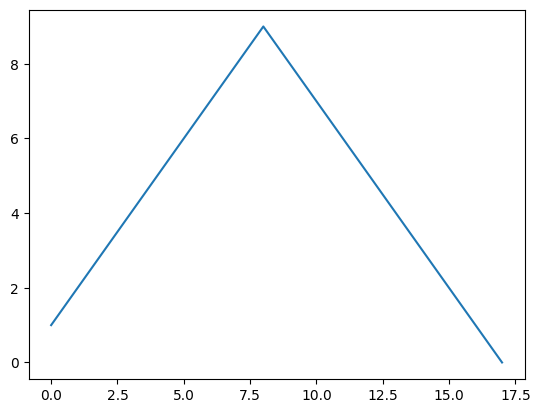

In [51]:
# plot: 간단한 그래프 그려보기
# figure()로 시작해서 show()로 마무리
# plot(): 값을 선으로 이여서 표현, 일반적으로 list 대상으로 사용
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

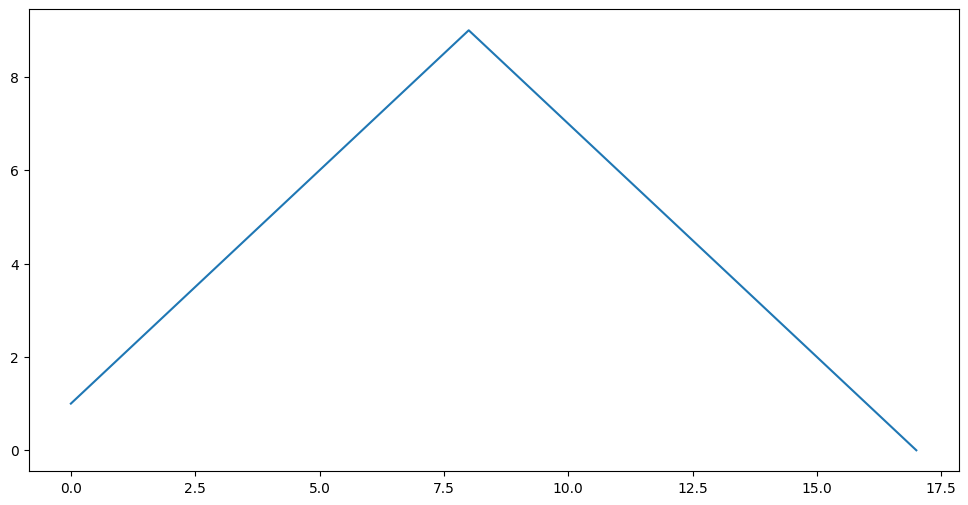

In [52]:
# 리스트를 변수에 저장하여 사용하면 더 편리함
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]

# figure() 내에 figsize 옵션을 통해 그래프 크기 조절 가능
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.show()

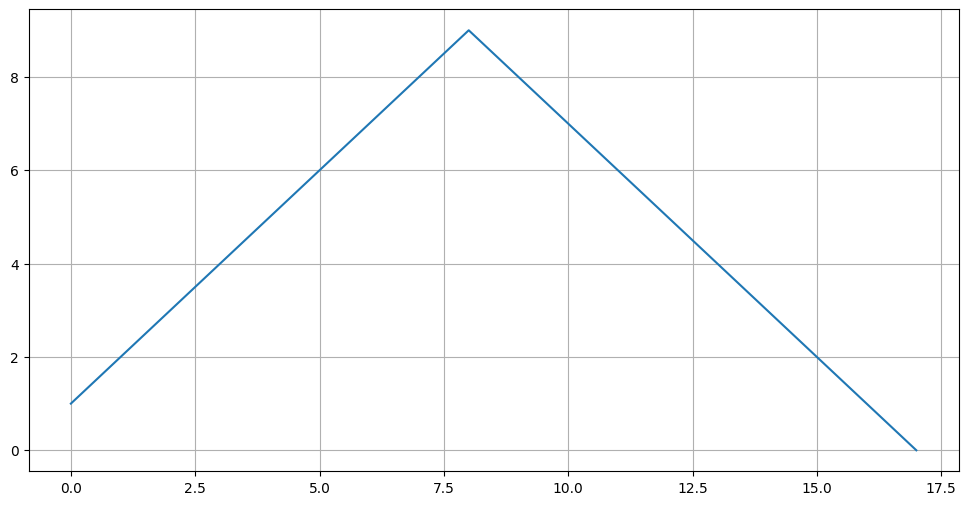

In [53]:
# 보통 그래프는 x, y 값을 입력받아 출력
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]
x = range(0, len(y))

plt. figure(figsize=(12, 6))
plt.plot(x, y)
plt.grid() # 그래프에 격자 추가

plt.show()

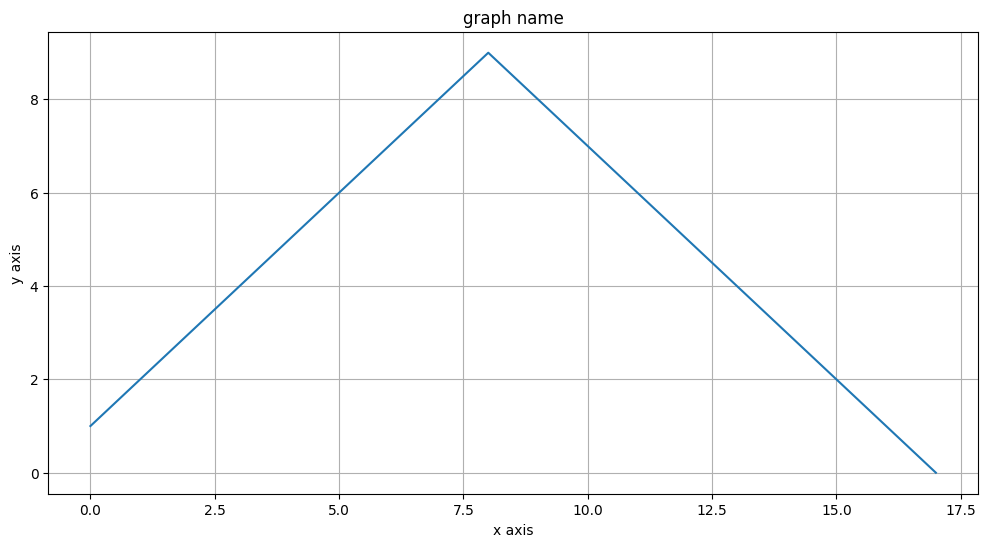

In [55]:
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]
x = range(0, len(y))

plt. figure(figsize=(12, 6))
plt.plot(x, y)
plt.grid()
# 그래프 제목과 각 축의 이름도 지정 가능
plt.title('graph name')
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.show()

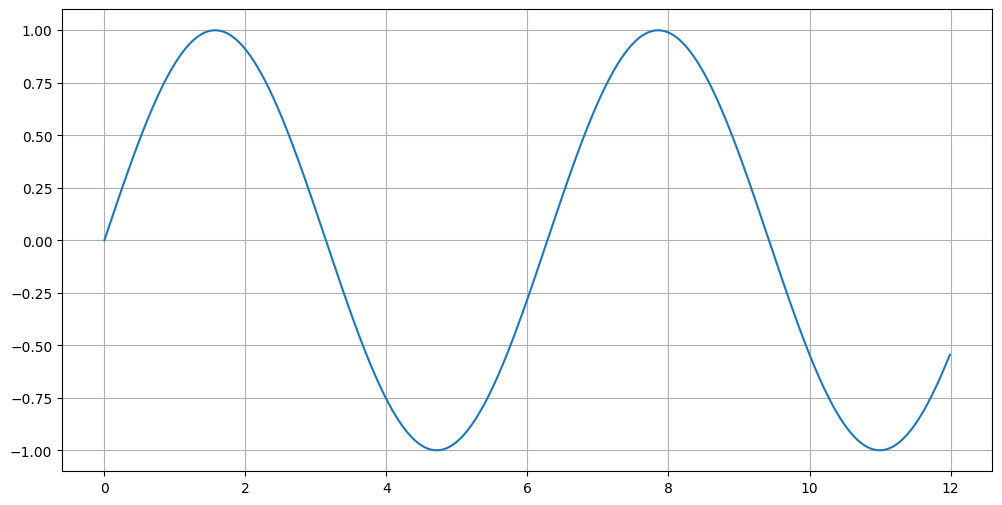

In [58]:
# sin 그래프 그려보기
import numpy as np

# numpy의 arrange
  # 시작 값, 끝 값, 간격 값을 정해서 배열 생성
  # 0부터 12까지 0.01 간격으로 t를 설정
  # range()는 정수만 생성 가능, arange()는 실수도 생성 가능
t = np.arange(0, 12, 0.01)
# y값을 한 번에 생성 후 plot(t, y)로 출력
y = np.sin(t)

plt.figure(figsize=(12, 6))
plt.plot(t, y)
plt.grid()
plt.show()

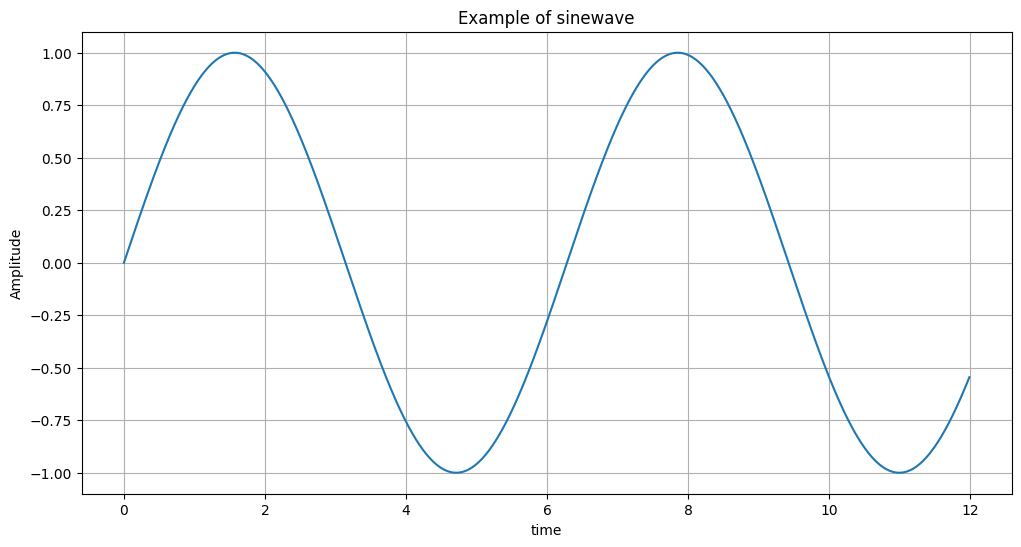

In [59]:
# sin 그래프에 제목, x축, y축 이름 추가
plt.figure(figsize=(12, 6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

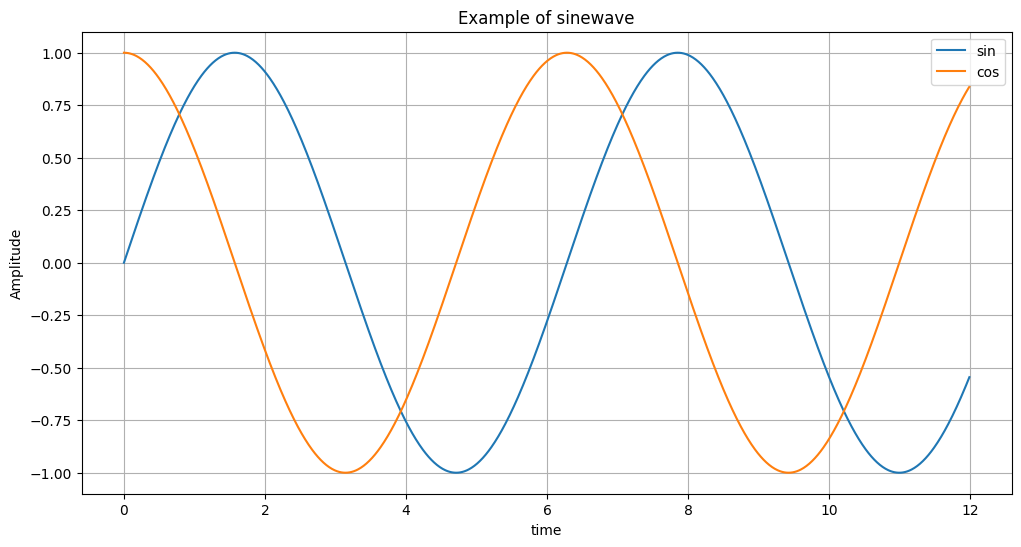

In [60]:
# sin 그래프에 cos 그래프 추가
plt.figure(figsize=(12, 6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

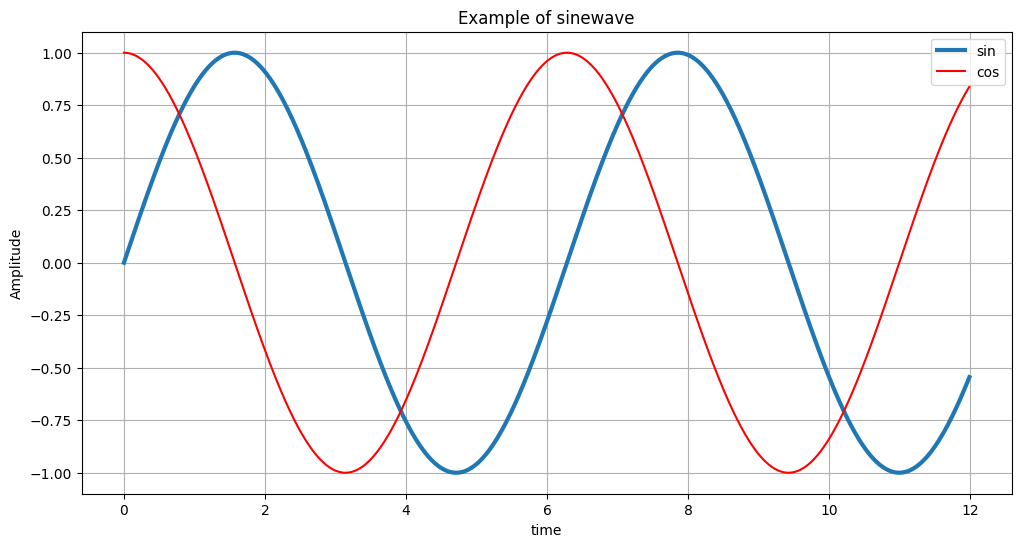

In [61]:
# lw(line width): 선 두께와 색깔 변경
# 선 색깔 = {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
plt.figure(figsize=(12, 6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

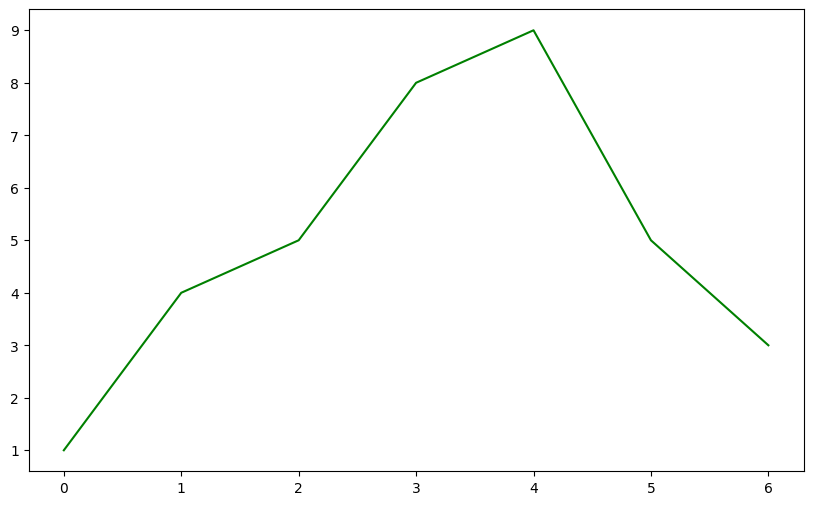

In [62]:
# 그래프 출력 옵션 - 선 색깔
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green')
plt.show()

In [ ]:
# 그래프 출력 옵션 - 선 종류
# {'solid', 'dotted', 'dashed', 'dashdot'}
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

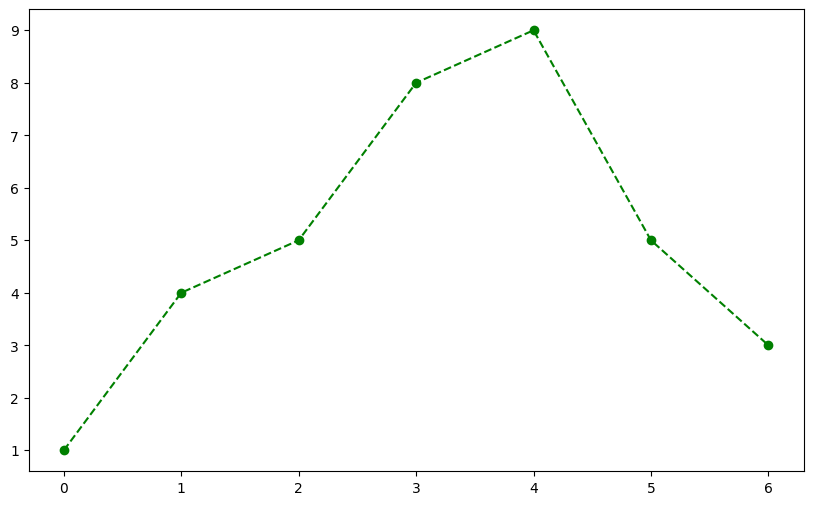

In [66]:
# 그래프 출력 옵션 - 마커 추가
# {'o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X}
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

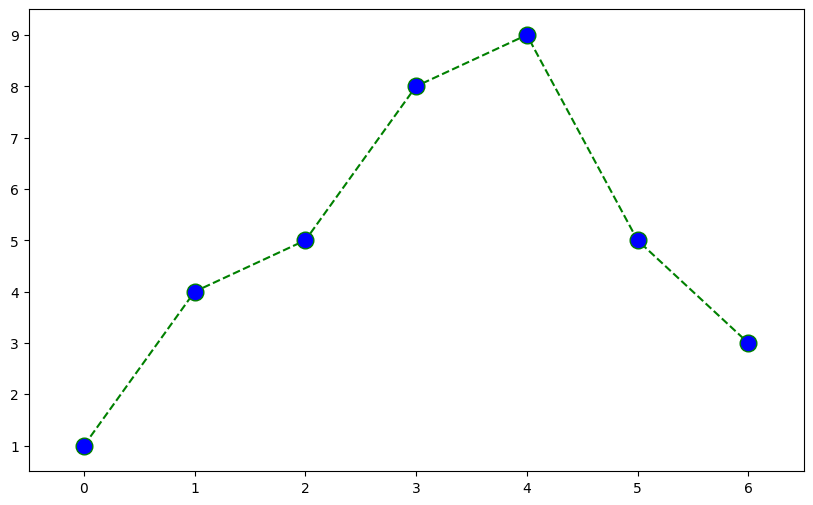

In [67]:
# 그래프 출력 옵션 - 마커 색깔 변경
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

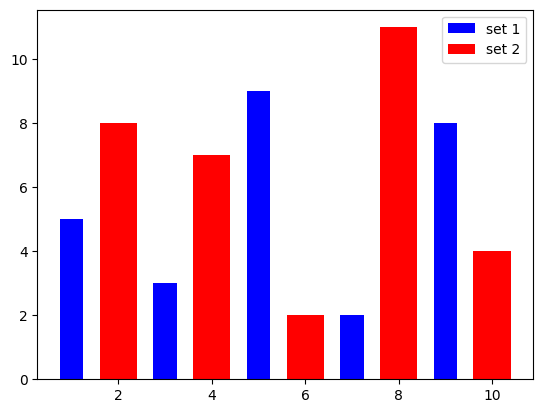

In [68]:
# bar(): 막대 그래프 출력
x1 = [1, 3, 5, 7, 9]
y1 = [5, 3, 9, 2, 8]

x2 = [2, 4, 6, 8, 10]
y2 = [8, 7, 2, 11, 4]

plt.bar(x1, y1, label='set 1', color='b', width=0.5)
plt.bar(x2, y2, label='set 2', color='r')

plt.legend() # 범례
plt.show()

(array([6., 8., 9., 1., 2.]),
 array([ 22.,  42.,  62.,  82., 102., 122.]),
 <BarContainer object of 5 artists>)

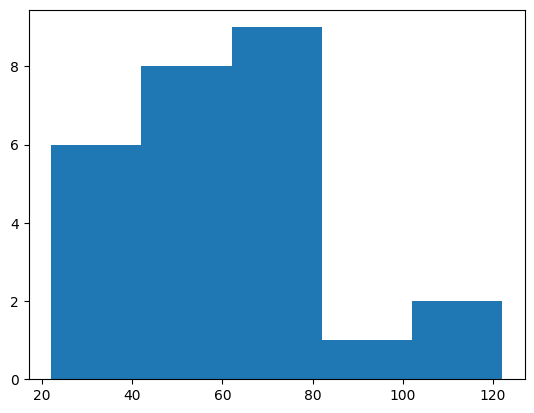

In [69]:
# hist(): 히스토그램 출력
data = [22, 55, 63, 23, 64, 47, 78, 112, 122, 75, 94, 64, 26, 23, 45, 46, 47, 48, 47, 45, 67, 68, 67, 68, 32, 22]
plt.hist(data, bins=5)

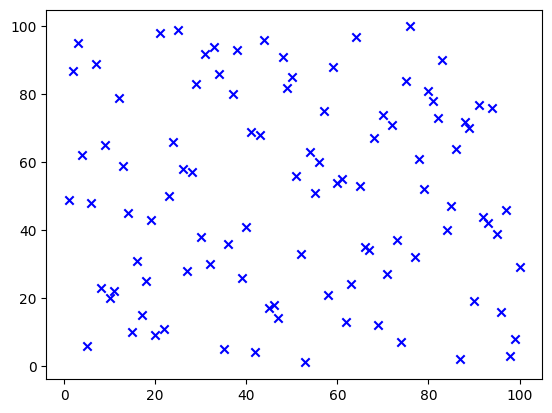

In [70]:
# scatter(): 산점도 출력
import random

x1 = [x + 1 for x in range(100)]
y1 = [y + 1 for y in range(100)]

random.shuffle(x1)
random.shuffle(y1)

plt.scatter(x1, y1, color='b', marker='x')

plt.show()

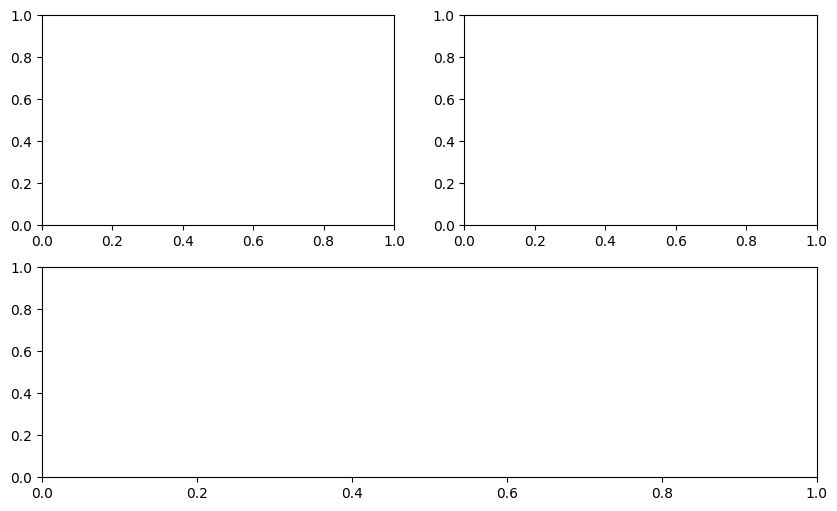

In [71]:
# subplot(): 여러 개의 작은 그래프로 하나의 그림으로 출력
# 그래프를 몇 행, 몇 열로 나눌지 & 몇 번째에 그래프를 둘지 지정 가능
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)
plt.subplot(2, 1, 2)

plt.show()

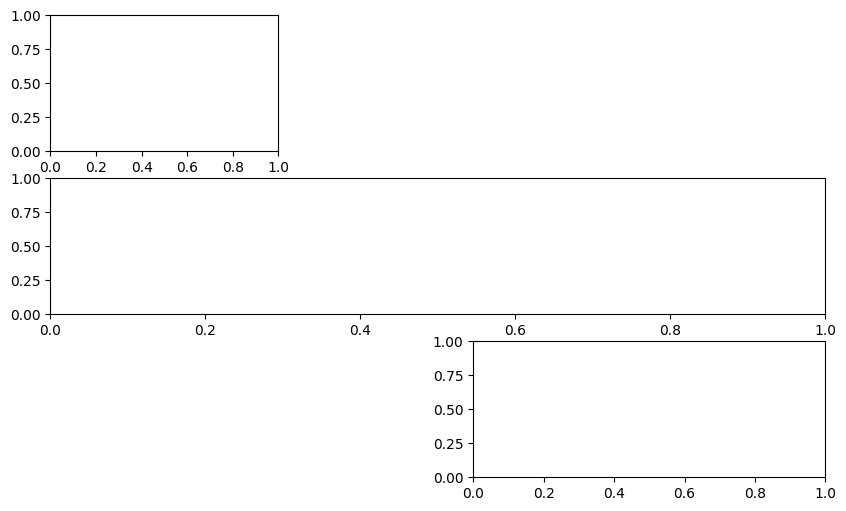

In [72]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 3, 1)
plt.subplot(3, 1, 2)
plt.subplot(3, 2, 6)

plt.show()

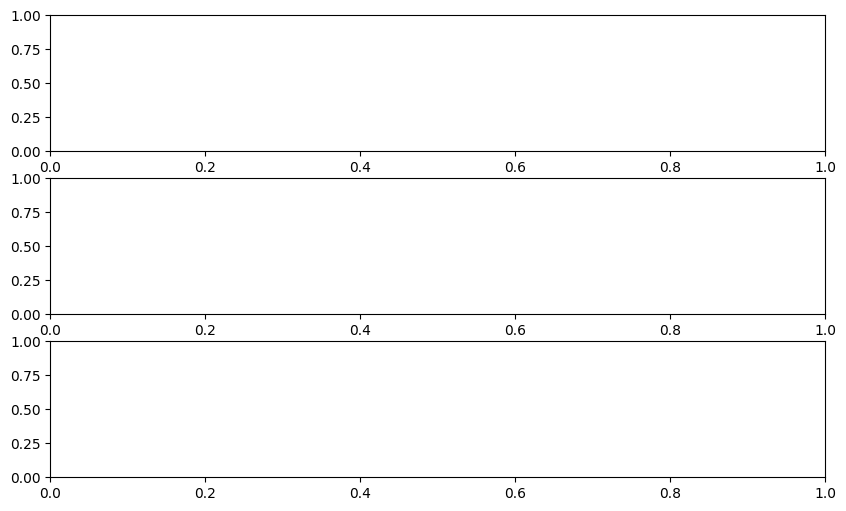

In [73]:
# subplots(행 개수, 열 개수, figsize)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
plt.show()

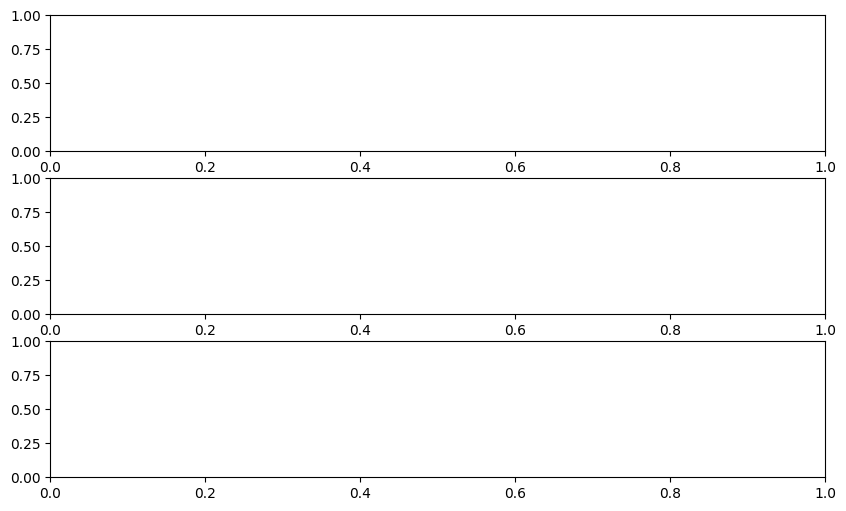

In [74]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.subplot(3, 1, 2)
plt.subplot(3, 1, 3)

plt.show()